🔹 Linear Kernel Results
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0

🔹 RBF Kernel Results
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


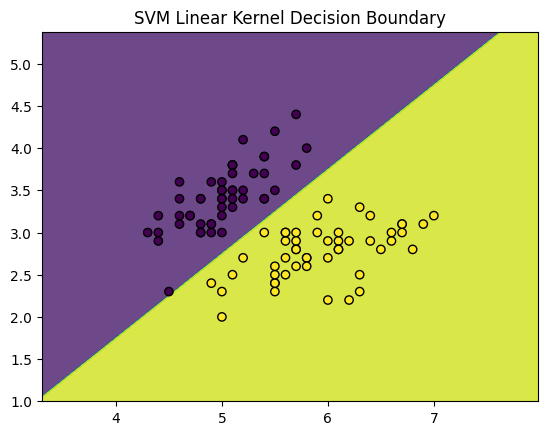

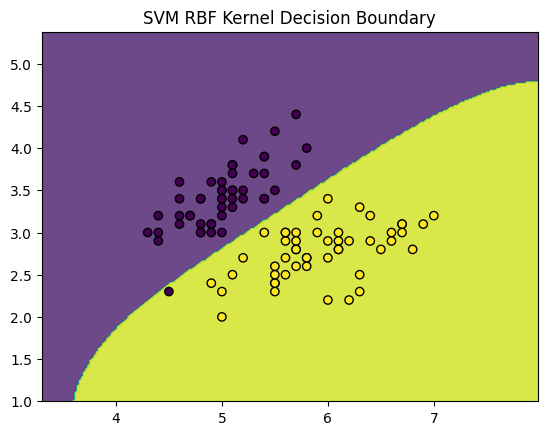

Fitting 5 folds for each of 16 candidates, totalling 80 fits

🔹 Best Parameters from GridSearch: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 1.0
Accuracy with Best Model: 1.0

🔹 Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [6]:
# Support Vector Machine (SVM) - Complete Guide

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load dataset (Binary classification: take only 2 classes from Iris for easy visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # only first 2 features for 2D visualization
y = iris.target

# Use only classes 0 and 1 (binary classification)
X = X[y < 2]
y = y[y < 2]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------------------
# 2. Train SVM with Linear Kernel
# ----------------------
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("🔹 Linear Kernel Results")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

# ----------------------
# 3. Train SVM with RBF Kernel (Non-linear)
# ----------------------
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("\n🔹 RBF Kernel Results")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

# ----------------------
# 4. Visualize Decision Boundaries
# ----------------------
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X, y, "SVM Linear Kernel Decision Boundary")
plot_decision_boundary(svm_rbf, X, y, "SVM RBF Kernel Decision Boundary")

# ----------------------
# 5. Hyperparameter Tuning with GridSearchCV
# ----------------------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.5, 1, 'scale'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("\n🔹 Best Parameters from GridSearch:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Final evaluation with best params
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))

# ----------------------
# 6. Cross-validation (General Performance Check)
# ----------------------
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("\n🔹 Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
